# Make Logbook of Trim images of CTIO Data
==================================================================================================

- author : Sylvie Dagoret-Campagne
- date   : January 23 2017


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from astropy.modeling import models
from astropy import units as u
from astropy import nddata
from astropy.io import fits
from astropy.table import Table, Column
import re
import os

In [2]:
import pandas as pd

In [3]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Location of trim images
----------------------------------

In [4]:
rootpath_rawimage="./trim_images"
object_name='HEN2_5' # Please put the good object name

In [5]:
#rootpath_rawimage="/Users/dagoret-campagnesylvie/MacOsX/LSST/MyWork/GitHub/CTIOData2016/November2016/mucol"
#object_name='mucol'
infos='ctio2017Jan19_HEN2-5-focus-R400'  # Please put the good date

In [6]:
logfile='logbk_'+object_name+'_'+infos+'.fits'
pandaslogfile='logbk_'+object_name+'_'+infos+'.csv'

In [7]:
filelist_all=os.listdir(rootpath_rawimage) 

In [8]:
#dirlist_all.remove('.DS_Store') # reove that file in a mAC
filelist_all

['trim_20170119_507.fits',
 'trim_20170119_508.fits',
 'trim_20170119_509.fits',
 'trim_20170119_510.fits',
 'trim_20170119_511.fits',
 'trim_20170119_512.fits',
 'trim_20170119_513.fits',
 'trim_20170119_514.fits',
 'trim_20170119_515.fits',
 'trim_20170119_516.fits',
 'trim_20170119_517.fits',
 'trim_20170119_518.fits',
 'trim_20170119_519.fits',
 'trim_20170119_520.fits',
 'trim_20170119_521.fits',
 'trim_20170119_522.fits',
 'trim_20170119_523.fits']

In [9]:
re.findall('^trim_20170117_([^ ]*).fits$','trim_20170117_195.fits')

['195']

In [10]:
re.findall('^trim_20170117_([0-9]+).fits$','trim_20170117_195.fits')

['195']

In [11]:
#index=0
#indexes_files= []
#filelist_fitsimages= []
#for dir in dirlist_all: # loop on directories, one per image       
#        dir_leaf= rootpath_rawimage+'/'+dir # build the name of leaf directory
#        listfiles=os.listdir(dir_leaf) 
#        for filename in listfiles:
#            if re.search('^trim.*fits$',filename):  #example of filename filter
#                index=index+1
#                shortfilename=dir_leaf+'/'+filename
#                filelist_fitsimages.append(shortfilename)
#                indexes_files.append(index)

In [12]:
index=0
indexes_files= []
filelist_fitsimages= []
for filename in filelist_all:
    if re.search('^trim.*fits$',filename):  #example of filename filter
        str_index=re.findall('^trim_20170119_([0-9]+).fits$',filename)
        index=int(str_index[0])
        indexes_files.append(index)
        fullpath=os.path.join(rootpath_rawimage,filename)
        filelist_fitsimages.append(fullpath)

### Build tables for output file

In [13]:
all_headers = []
all_dates = []
all_airmass = []
all_exposures = []
all_ut = []
all_ra = []
all_dec = []
all_epoch = []
all_zenith = []
all_ha = []
all_st = []
all_alt = []
all_focus = []
all_temp = []
all_press = []
all_hum = []
all_windsp = []
all_seeing = []
all_seeingam = []

for idx,file in np.ndenumerate(filelist_fitsimages):   
    hdu_list=fits.open(file)
    header=hdu_list[0].header
    date_obs = header['DATE-OBS']
    airmass = float(header['AIRMASS'])
    expo= float(header['EXPTIME'])
    num=indexes_files[idx[0]]
    all_dates.append(date_obs)
    all_airmass.append(airmass)
    all_headers.append(header)
    all_exposures.append(expo)
   
    ut=header['UT']
    ra=header['RA']
    dec=header['DEC']
    epoch=float(header['EPOCH'])
    zd = float(header['ZD'])
    ha = header['HA']
    st = header['ST']
    alt = float(header['ALT'])
    fcl = float(header['TELFOCUS'])
    temp= float(header['OUTTEMP'])
    press= float(header['OUTPRESS'])
    hum= float(header['OUTHUM'])
    windsp=float(header['WNDSPEED'])
    seeing=float(header['SEEING'])
    seeingam=float(header['SAIRMASS'])
    
    all_ut.append(ut)
    all_ra.append(ra)
    all_dec.append(dec)
    all_epoch.append(epoch)
    all_zenith.append(zd)
    all_ha.append(ha)
    all_st.append(st)
    all_alt.append(alt)
    all_focus.append(fcl)
    all_temp.append(temp)
    all_press.append(press)
    all_hum.append(hum)
    all_windsp.append(windsp)
    all_seeing.append(seeing)
    all_seeingam.append(seeingam)

    hdu_list.close()
    

## Build outputfile

In [14]:
col_airmass=np.array(all_airmass)
col_number=np.array(indexes_files)
col_date=np.array(all_dates)
col_filename=np.array(filelist_all)
col_exposure=np.array(all_exposures)
col_zenith=np.array(all_zenith)
col_altitude=np.array(all_alt)
col_temperature=np.array(all_temp)
col_pressure=np.array(all_press)
col_humidity=np.array(all_hum)
col_windsp=np.array(all_windsp)
col_seeing=np.array(all_seeing)


In [15]:
c1 = fits.Column(name='number', format='J', array=col_number)
c2 = fits.Column(name='airmass', format='E', array=col_airmass)
c3 = fits.Column(name='date', format='A50', array=col_date)
c4 = fits.Column(name='filename', format='A30', array=col_filename)
c5 = fits.Column(name='exposure', format='E', array=col_exposure) 
c6 = fits.Column(name='zenith', format='E', array=col_zenith) 
#c7 = fits.Column(name='altitude', format='E', array=col_altitude) 
c8 = fits.Column(name='temperature', format='E', array=col_temperature) 
c9 = fits.Column(name='pressure', format='E', array=col_pressure) 
c10 = fits.Column(name='humidity', format='E', array=col_humidity) 
c11 = fits.Column(name='windspeed', format='E', array=col_windsp) 
c12 = fits.Column(name='seeing', format='E', array=col_seeing) 


In [16]:
tbhdu = fits.BinTableHDU.from_columns([c1, c2, c3, c4, c5,c6,c8,c9,c10,c11,c12])

In [17]:
tbhdu.writeto(logfile,clobber=True)

## Convert into Table
---------------------------

In [18]:
thetable= Table(tbhdu.data)

In [19]:
thetable.show_in_notebook()

idx,number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
0,507,1.405,2017-01-20T08:06:33.111,trim_20170119_507.fits,180.0,44.674,16.5,778.0,57.0,4.1,0.829
1,508,1.421,2017-01-20T08:10:41.115,trim_20170119_508.fits,180.0,45.316,16.4,778.0,57.0,6.2,0.822
2,509,1.437,2017-01-20T08:14:47.119,trim_20170119_509.fits,180.0,45.956,16.0,778.0,58.0,4.3,0.921
3,510,1.454,2017-01-20T08:19:00.562,trim_20170119_510.fits,180.0,46.614,15.6,778.0,59.0,5.1,0.778
4,511,1.474,2017-01-20T08:23:32.763,trim_20170119_511.fits,180.0,47.323,15.3,778.0,60.0,10.0,0.966
5,512,1.491,2017-01-20T08:27:31.069,trim_20170119_512.fits,180.0,47.944,15.1,778.0,61.0,9.8,1.222
6,513,1.509,2017-01-20T08:31:29.767,trim_20170119_513.fits,180.0,48.565,15.2,778.0,61.0,8.3,1.246
7,514,1.528,2017-01-20T08:35:33.470,trim_20170119_514.fits,180.0,49.201,15.2,778.0,62.0,9.6,1.156
8,515,1.548,2017-01-20T08:39:37.512,trim_20170119_515.fits,180.0,49.837,15.2,778.0,62.0,11.0,1.369
9,516,1.569,2017-01-20T08:43:40.054,trim_20170119_516.fits,180.0,50.47,15.4,778.0,62.0,6.9,0.973


## Read the logfile into a Table
---------------------------------------

In [20]:
t = Table.read(logfile)

In [21]:
t

number,airmass,date,filename,exposure,zenith,temperature,pressure,humidity,windspeed,seeing
int32,float32,str50,str30,float32,float32,float32,float32,float32,float32,float32
507,1.405,2017-01-20T08:06:33.111,trim_20170119_507.fits,180.0,44.674,16.5,778.0,57.0,4.1,0.829
508,1.421,2017-01-20T08:10:41.115,trim_20170119_508.fits,180.0,45.316,16.4,778.0,57.0,6.2,0.822
509,1.437,2017-01-20T08:14:47.119,trim_20170119_509.fits,180.0,45.956,16.0,778.0,58.0,4.3,0.921
510,1.454,2017-01-20T08:19:00.562,trim_20170119_510.fits,180.0,46.614,15.6,778.0,59.0,5.1,0.778
511,1.474,2017-01-20T08:23:32.763,trim_20170119_511.fits,180.0,47.323,15.3,778.0,60.0,10.0,0.966
512,1.491,2017-01-20T08:27:31.069,trim_20170119_512.fits,180.0,47.944,15.1,778.0,61.0,9.8,1.222
513,1.509,2017-01-20T08:31:29.767,trim_20170119_513.fits,180.0,48.565,15.2,778.0,61.0,8.3,1.246
514,1.528,2017-01-20T08:35:33.470,trim_20170119_514.fits,180.0,49.201,15.2,778.0,62.0,9.6,1.156
515,1.548,2017-01-20T08:39:37.512,trim_20170119_515.fits,180.0,49.837,15.2,778.0,62.0,11.0,1.369


## Convert into pandas to plot
---------------------------------------

In [22]:
df = t.to_pandas()

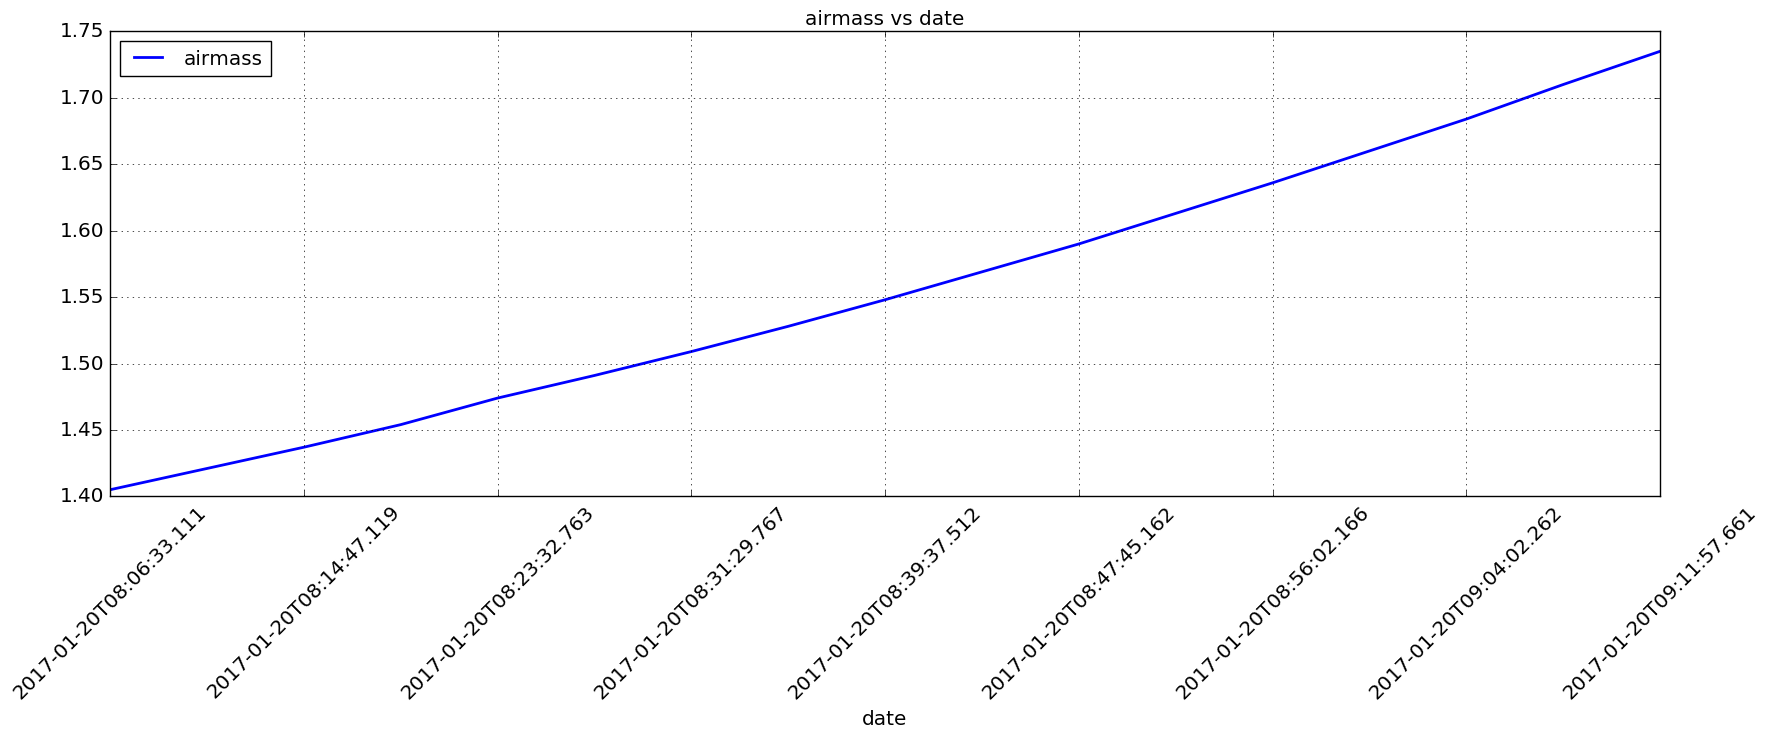

In [23]:
df.plot('date','airmass',figsize=(20,6),rot=45,grid=True,title='airmass vs date',color='b',linewidth=2)


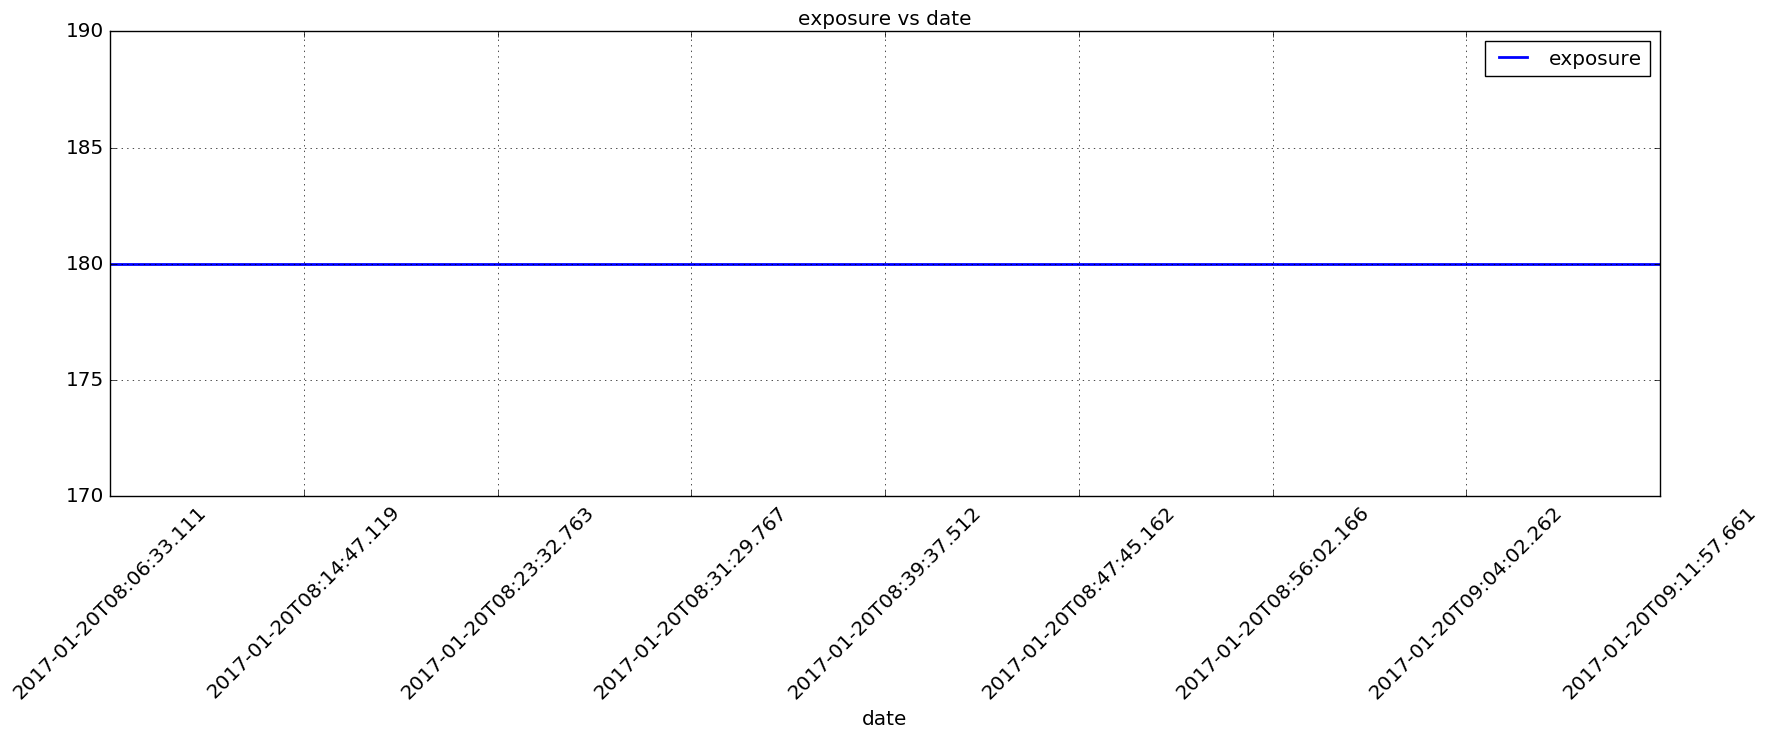

In [24]:
df.plot('date','exposure',figsize=(20,6),rot=45,grid=True,title='exposure vs date',color='b',linewidth=2)

### Save pandas file


In [25]:
df.to_csv(pandaslogfile)